In [80]:
import pandas as pd
df = pd.read_parquet('./material/snr_point.pq')

import numpy as np
df['lon'] = df['lon_pair'].apply(np.mean)
df['lat'] = df['lat_pair'].apply(np.mean)

In [81]:
df['ref'].unique()

array(['LUCAS'], dtype=object)

### group by land covers

In [56]:
survey_dict = {
    "A": "artificial land",
    "B": "cropland",
    "C": "woodland",
    "D": "shrubland",
    "E": "grassland",
    "F": "bareland & lichens/moss",
    "G": "water areas & wetland", # water areas
    "H": "water areas & wetland", #"wetland",
}

df['lc_level1_t0'] = df['lc_survey_pair'].str[0].str[0]
df['lc_level1_t1'] = df['lc_survey_pair'].str[1].str[0]

df['lc_level1_t0'] = df['lc_level1_t0'].map(survey_dict)
df['lc_level1_t1'] = df['lc_level1_t1'].map(survey_dict)

df['lc_level1'] = df['lc_level1_t0']  + ' - ' + df['lc_level1_t1']

df = df.drop(columns = ['lc_level1_t0', 'lc_level1_t1'])

### plot spatial distribution

/tmp/ipykernel_2298995/1416220424.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


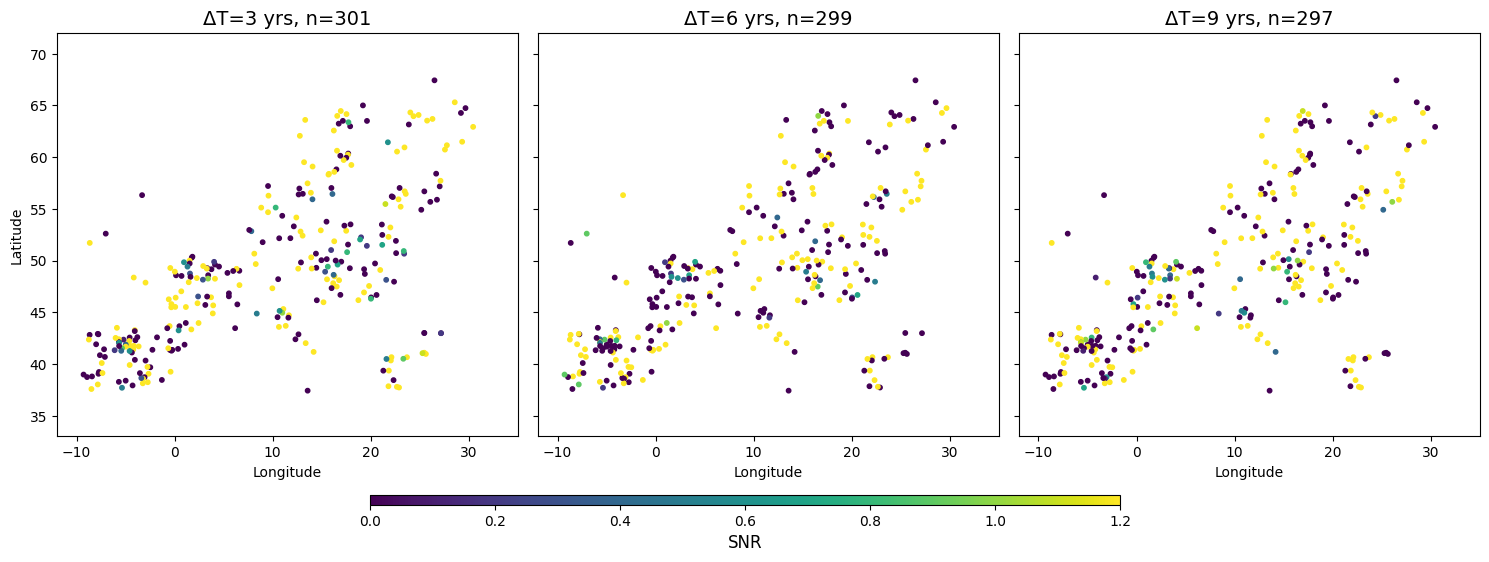

In [75]:
import matplotlib.pyplot as plt

latbox = [33, 72]
lonbox = [-12, 35]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, year in zip(axes, [3, 6, 9]):
    dff = df[df['year_change'] == year]
    sc = ax.scatter(dff['lon'], dff['lat'], s=10, c=dff['soc_change'], vmin=0, vmax=1.2)
    ax.set_title(f'ΔT={year} yrs, n={len(dff)}', fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_xlim(lonbox)
    ax.set_ylim(latbox)
    # ax.grid(True)

axes[0].set_ylabel('Latitude')

cbar_ax = fig.add_axes([0.25, -0.02, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SNR', fontsize=12)

plt.tight_layout()
plt.show()


### plot temporal difference

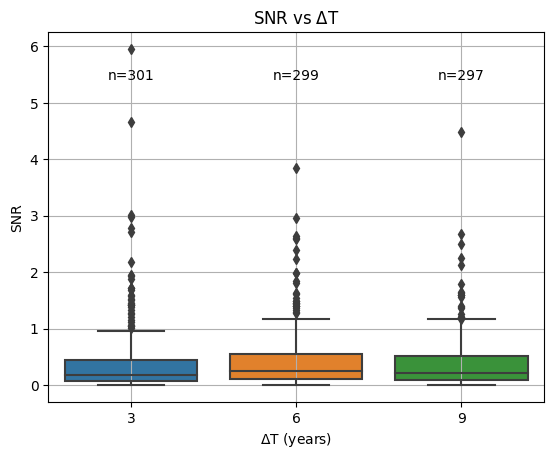

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='year_change', y='snr', data=df)
# sns.violinplot(x='year_change', y='snr', data=df)
plt.xlabel('$\Delta$T (years)')
plt.ylabel('SNR')
plt.title('SNR vs $\Delta$T')
plt.grid(True)

group_counts = df['year_change'].value_counts().sort_index()

for i, (x_val, count) in enumerate(group_counts.items()):
    plt.text(i, df['snr'].max()*0.9, f'n={count}', 
             ha='center', va='bottom', fontsize=10)
    
plt.show()


## plot changes for different lc change

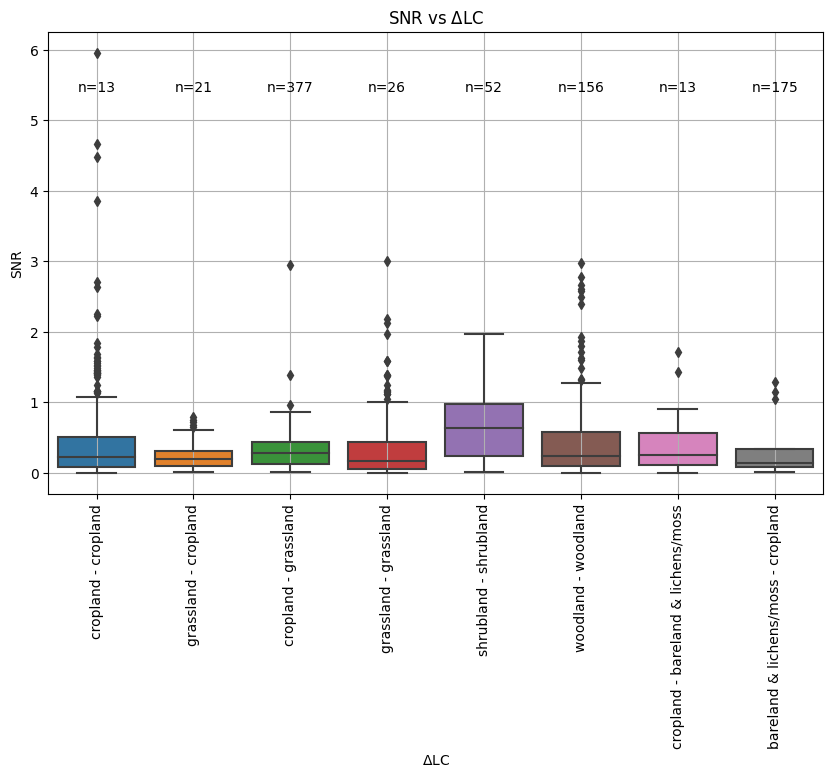

In [73]:
# only lc groups with more than 10 points
lc_counts = df['lc_level1'].value_counts() # count df
engh_lc = lc_counts[lc_counts>10].index # index here is the lc_level1 covers
fdf = df.loc[df['lc_level1'].isin(engh_lc)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='lc_level1', y='snr', data=fdf)
# sns.violinplot(x='year_change', y='snr', data=df)
plt.xlabel('$\Delta$LC')
plt.ylabel('SNR')
plt.title('SNR vs $\Delta$LC')
plt.xticks(rotation=90)

plt.grid(True)

group_counts = fdf['lc_level1'].value_counts().sort_index()

for i, (x_val, count) in enumerate(group_counts.items()):
    plt.text(i, df['snr'].max()*0.9, f'n={count}', 
             ha='center', va='bottom', fontsize=10)
    
plt.show()